# Heart Failure Prediction

Dataset sourced from https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

### Data Loading

In [1]:
import pandas as pd

# Load in the CSV content to a pandas dataframe
df = pd.read_csv("heart.csv")
print(df.head(5)) # Look at the contents

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


### Exploratory Data Analysis

In [2]:
# Analysing the desciptive satistics of the dataframe columns

for column in df:
    desc = df[column].describe()
    print(f"\nColumn: {column}")
    print("=" * (8 + len(column)))
    for stat in desc.index:
        print(f"{stat: <10}: {desc[stat]: >10}")


Column: Age
count     :      918.0
mean      : 53.510893246187365
std       : 9.43261650673201
min       :       28.0
25%       :       47.0
50%       :       54.0
75%       :       60.0
max       :       77.0

Column: Sex
count     :        918
unique    :          2
top       :          M
freq      :        725

Column: ChestPainType
count     :        918
unique    :          4
top       :        ASY
freq      :        496

Column: RestingBP
count     :      918.0
mean      : 132.39651416122004
std       : 18.5141541199078
min       :        0.0
25%       :      120.0
50%       :      130.0
75%       :      140.0
max       :      200.0

Column: Cholesterol
count     :      918.0
mean      : 198.7995642701525
std       : 109.38414455220348
min       :        0.0
25%       :     173.25
50%       :      223.0
75%       :      267.0
max       :      603.0

Column: FastingBS
count     :      918.0
mean      : 0.23311546840958605
std       : 0.423045624739303
min       :        0.0
25%  

In [3]:
# Checking for nulls

print(df.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


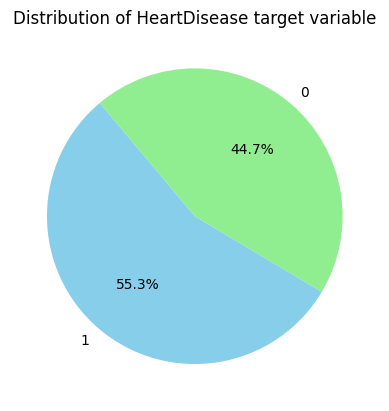

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyse the distribution of the target variable (HeartDisease)
proportion = df["HeartDisease"].value_counts(normalize=True)
proportion.plot(kind="pie",  autopct='%1.1f%%', startangle=130, colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title("Distribution of HeartDisease target variable")
plt.ylabel("")
plt.show()


Over 50% of the sample have heart disease.

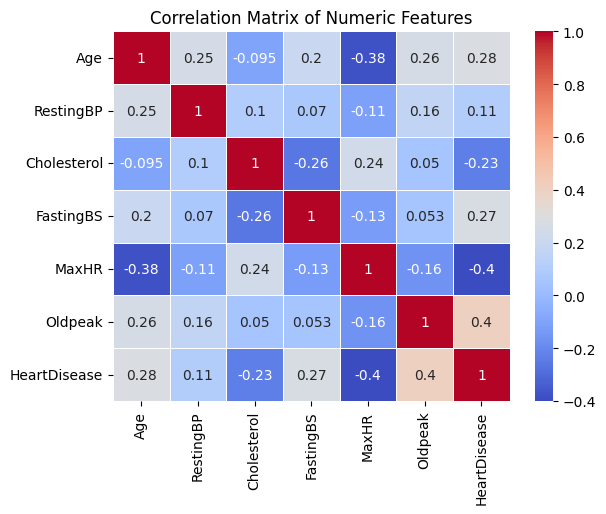

In [5]:
# Analyse the correlation coefficients between the features and the target variable

correlation = df.corr(numeric_only=True)

sns.heatmap(correlation, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features")
plt.show()

No numeric features are strongly correlated with eachother enough to cause any concern.

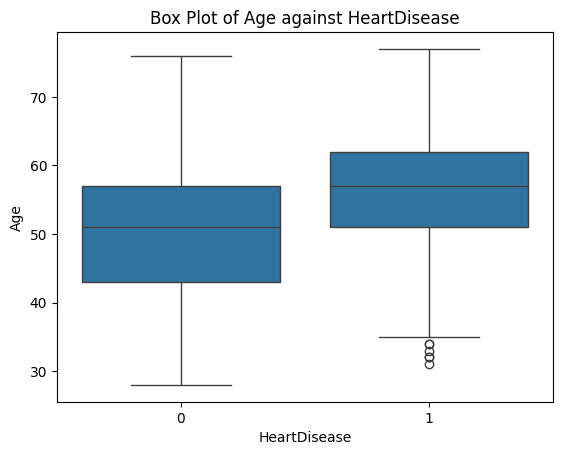

In [6]:
# Analysing relationships between features and target

sns.boxplot(x="HeartDisease", y="Age", data=df)
plt.title("Box Plot of Age against HeartDisease")
plt.show()

The above shows that on average, individuals with heart disease are typically older, and the minimum age of any person with heart disease is older than the youngest person in the sample who does not have heart disease. There are also a few outliers of individuals with heart disease who are younger than expected.

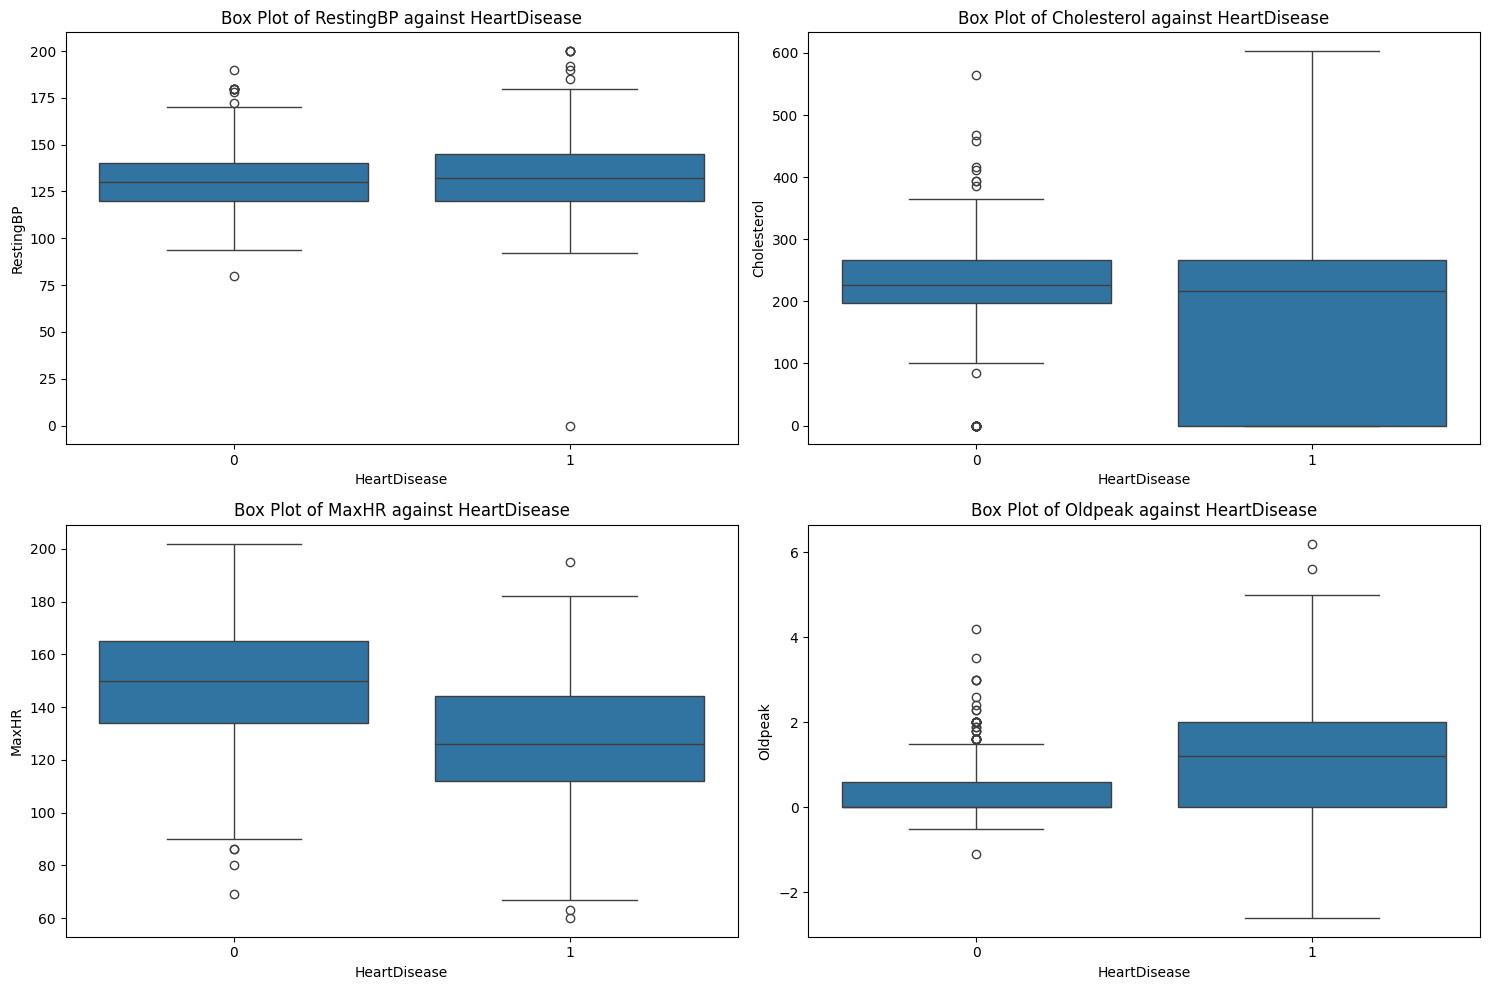

In [7]:
# Creating a grid of box plots for the numeric columns (bar Age) against HeartDisease
numeric_cols = ["RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]

# Initialisng the grid variables
num_plots = len(numeric_cols)
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols

# Creates subplots and flattens shape of axes to create 1D array for loop purposes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15,10))
axes = axes.flatten()

# Creating the box plots within a loop
for i, col, in enumerate(numeric_cols):
    sns.boxplot(x="HeartDisease", y=col, data=df, ax=axes[i])
    axes[i].set_title(f"Box Plot of {col} against HeartDisease")

# Removes any empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

The above box plots show some interesting interactions with the numeric features and the target variable. 

- RestingBP (resting blood pressure) appears to show no clear differences in distribution between patients with heart diease and those without.
- Patients with heart disease tend to have higher cholesterol levels than those without heart disease, as indicated by the higher median and IQR.
- Lower MaxHR (maximum heart rates) are more commonly associated with patients who have heart disease.
- Patients with hear disease tend to have higher Oldpeak valyes comapred to those without heart disease.

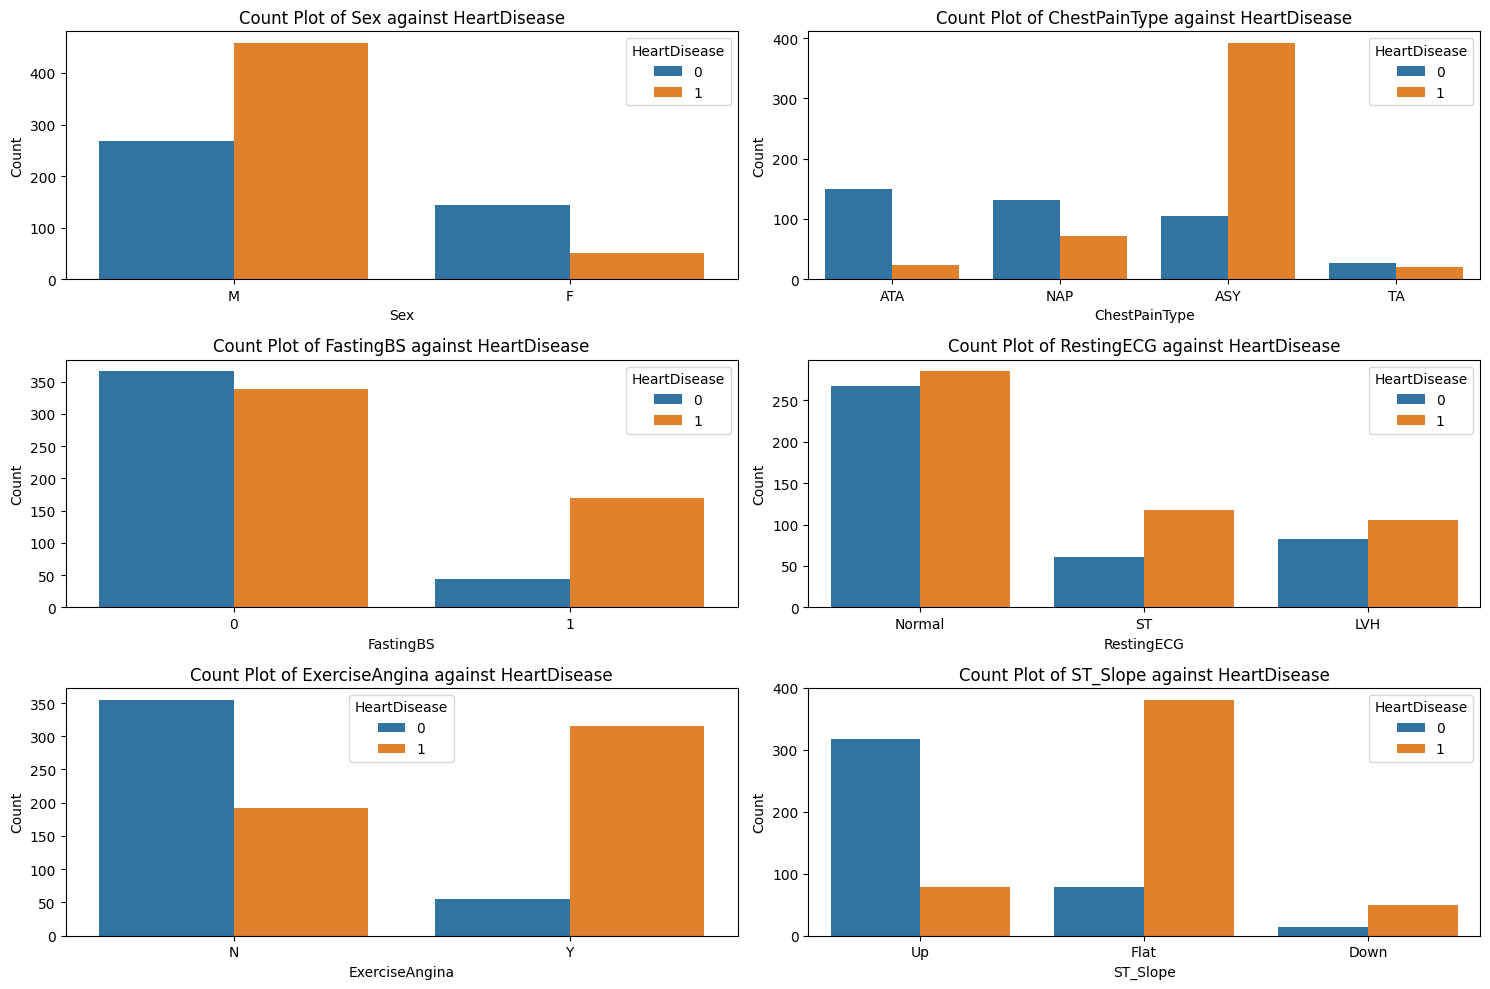

In [8]:
# Same as above, but creating countplots with the categorical features.
categorical_features = ["Sex", "ChestPainType", "FastingBS", "RestingECG", "ExerciseAngina", "ST_Slope"]

num_plots = len(categorical_features)
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15,10))
axes = axes.flatten()

for i, col, in enumerate(categorical_features):
    sns.countplot(x=col, hue="HeartDisease", data=df, ax=axes[i])
    axes[i].set_title(f"Count Plot of {col} against HeartDisease")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

The above count plots provide some interesting insights into how the categorical features interact with the target variable.

- Male patients on average are much more likely to have heart disease than female patients.
- The ASY (Asymptomatic) ChestPainType (chest pain type) appears to be a much more striking symptom of heart disease than the others.
- Patients with exercise angina are more likely to have heart disease than they are not.
- Patients with a flat, or down ST slope are much more likely, on average, to have heart disease than those with an upwards slope.

Overall, this section of exploring the data through analysis has shown that all features within the dataset appear to have some sort of indicitative effect on whether a patient has heart disease, bar maybe RestingBP - but we will trial using this feature regardless and determine whether or not to exclude it in the following sections.

Next, the categorical features need to be properly coded up before attempting to model the data.

### Data Pre-processing

In [9]:
# Normalising the numeric features using standard scaling.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numeric_cols.append("Age")
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [10]:
# Encoding the categorical features
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Converting the features with two categories into a binary variable
label = LabelEncoder()

df["Male"] = label.fit_transform(df["Sex"]) 
df["ExerciseAngina"] = label.fit_transform(df["ExerciseAngina"])
df.drop(columns=["Sex"], inplace=True)

# Converting the features with >2 categories into a dummy variables
df = pd.get_dummies(df, columns=["ChestPainType", "RestingECG", "ST_Slope"], drop_first=True) # Dropping first to avoid multicollinearity issues

print(df.columns)

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR',
       'ExerciseAngina', 'Oldpeak', 'HeartDisease', 'Male',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_Normal', 'RestingECG_ST', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')


We now have dummy variables, with the ASY being the reference label for ChestPainType, LVH for RestingECG, and Down for ST_Slope.

### Model Selection

In [11]:
# Splitting the sample into training and testing sets.
from sklearn.model_selection import train_test_split

X = df.drop(columns=["HeartDisease"])
y = df["HeartDisease"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=26)

In [12]:
# Beginning with training a logistic model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train the model on training data
model_log = LogisticRegression()
model_log.fit(X_train, y_train)

# Logistic model predicts values of y based on test set
y_pred_log = model_log.predict(X_test)

# Different metrics to assess model performance
accuracy = accuracy_score(y_test, y_pred_log)
conf_matrix = confusion_matrix(y_test, y_pred_log)
class_report = classification_report(y_test, y_pred_log)

print("\nAccuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Accuracy: 0.8478260869565217

Confusion Matrix:
 [[77 12]
 [16 79]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85        89
           1       0.87      0.83      0.85        95

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



The above metrics show that the model performs relatively well, with an accuracy score of 85% meaning that the model correctly classifies 85% of the test set. The classification report and confusion matrix show us that the model is not biases towards one of the classes and performs well on both.

K-Fold Cross-Validation Scores: [0.84782609 0.86956522 0.8423913  0.90710383 0.85245902] | Mean Accuracy: 0.8639


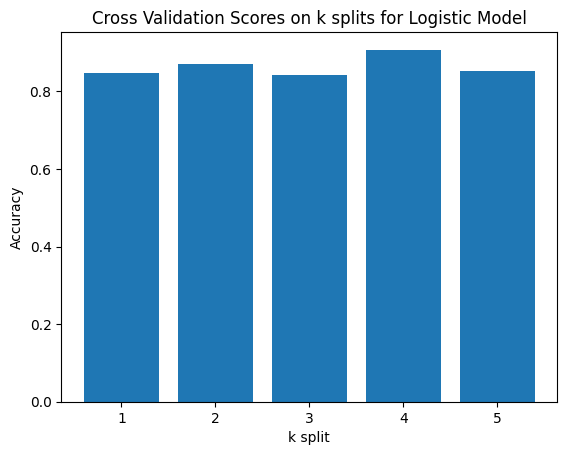

In [16]:
# Cross validation to test whether model is reliable over different sets of data
from sklearn.model_selection import KFold, cross_val_score

k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=26)

cv_scores = cross_val_score(model_log, X, y, cv=kf, scoring="accuracy")

print(f"K-Fold Cross-Validation Scores: {cv_scores} | Mean Accuracy: {cv_scores.mean():.4f}")

plt.bar(range(1, k + 1), cv_scores)
plt.title("Cross Validation Scores on k splits for Logistic Model")
plt.ylabel("Accuracy")
plt.xlabel("k split")
plt.show()

The results of the K-fold cross validation scores show that the model does not have high variance and therefore no signs of overfitting as the accuracy scores between the different splits of cross validation data are all close to the mean accuracy score of 86%, which is also very close to the original accuracy score from the test data set which was 85%.

Now let's try some other models.

In [39]:
# Training a Random Forest model
from sklearn.ensemble import RandomForestClassifier

# Initialise Random Forest model with 100 trees.
model_rf = RandomForestClassifier(n_estimators=100, random_state=26)
model_rf.fit(X_train, y_train)

# Predict y using initialised Random Forest Model.
y_pred_rf = model_rf.predict(X_test)

# Evaluate model on accuracy metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print(f'Accuracy: {accuracy_rf}')
print('Confusion Matrix:')
print(conf_matrix_rf)
print('Classification Report:')
print(class_report_rf)

Accuracy: 0.8804347826086957
Confusion Matrix:
[[78 11]
 [11 84]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        89
           1       0.88      0.88      0.88        95

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



The Random Forest shows a slight improvement in the evaluation metrics. The accuracy has risen from 85% to 88% - we will now perform cross validation tests to check that the model is not overfitting.

K-Fold Cross-Validation Scores: [0.86956522 0.83152174 0.85869565 0.8852459  0.8852459 ] | Mean Accuracy: 0.8661


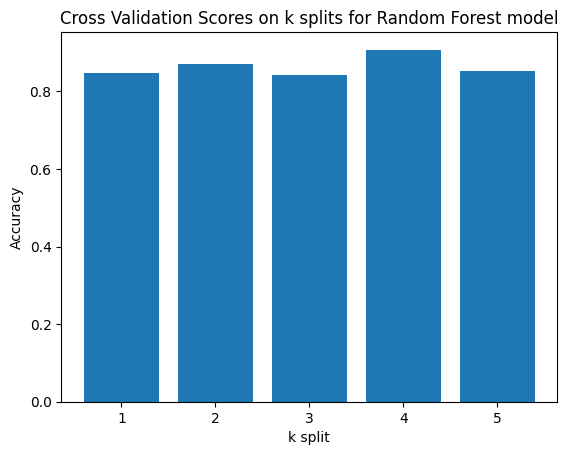

In [40]:
# Creating cross val scores based on random forest model, using same kf from earlier.
cv_scores_rf = cross_val_score(model_rf, X, y, cv=kf, scoring="accuracy")

print(f"K-Fold Cross-Validation Scores: {cv_scores_rf} | Mean Accuracy: {cv_scores_rf.mean():.4f}")

plt.bar(range(1, k + 1), cv_scores)
plt.title("Cross Validation Scores on k splits for Random Forest model")
plt.ylabel("Accuracy")
plt.xlabel("k split")
plt.show()

Interestingly, the cross validation testing shows that almost identical results of mean accuracy across the 5 folds when compared to the Logistic model. The model does not show signs of high variance and performs very similarly to the logistic model.

Now, we will try an XGBoost model.

In [41]:
# Implementing an XGBoost model with the hyperparameters tuned using GridSearchCV
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

model_xgb = XGBClassifier(random_state=26)

# Initalising the parameter grid that the GridSearchCV can try combinations with for the model
param_grid = {
    "n_estimators": [25, 50, 100],
    "max_depth": [2, 3, 4],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.7, 0.8, 0.9],
    "reg_alpha": [0, 1.5, 2],
    "reg_lambda": [1,1.5, 2]  
}

# Initialising GridSearchCV with 5 cross vals
grid_search = GridSearchCV(estimator=model_xgb, param_grid=param_grid, cv=5, scoring="accuracy", n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Find and display tuned hyperparameters
best_params = grid_search.best_params_
print(f'Best parameters found: {best_params}')

# Find and predict y using model with hyperparameters from above
best_model = grid_search.best_estimator_
y_pred_xgb = best_model.predict(X_test)

# Evaluate model on accuracy metrics.
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)

print(f'Accuracy: {accuracy_xgb}')
print('Confusion Matrix:')
print(conf_matrix_xgb)
print('Classification Report:')
print(class_report_xgb)


Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best parameters found: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50, 'reg_alpha': 1.5, 'reg_lambda': 1.5, 'subsample': 0.7}
Accuracy: 0.8586956521739131
Confusion Matrix:
[[77 12]
 [14 81]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86        89
           1       0.87      0.85      0.86        95

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



The GridSearchCV chose the optimal hyperparameters for the model based on the cross validations, yet the model performs just as well as the simple logistic model, and worse than the Random Forest model.

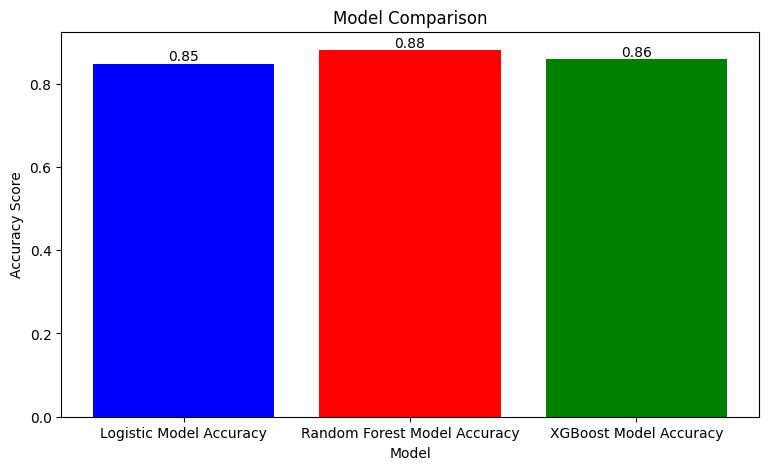

In [42]:
# Initialise dictionary to store model accuracy scores
accuracy_scores = {
    "Logistic Model Accuracy": accuracy,
    "Random Forest Model Accuracy": accuracy_rf,
    "XGBoost Model Accuracy": accuracy_xgb
}

# Create a bar plot that displays each model's scores
plt.figure(figsize=(9,5))
bars = plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=["blue", "red", "green"])

# Iterate through each bar and find height of the bar, add this as a data label at the top.
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval,  f"{yval:.2f}", ha="center", va="bottom")

# Display plot
plt.title("Model Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy Score")
plt.show()

As you can see from the plot above, all of the models perform very similarly. None show any clear signs of high bias or high variance, but it is the Random Forest model that margainly displays the best fit of the data. This will be the model that we choose.

### Model Insights

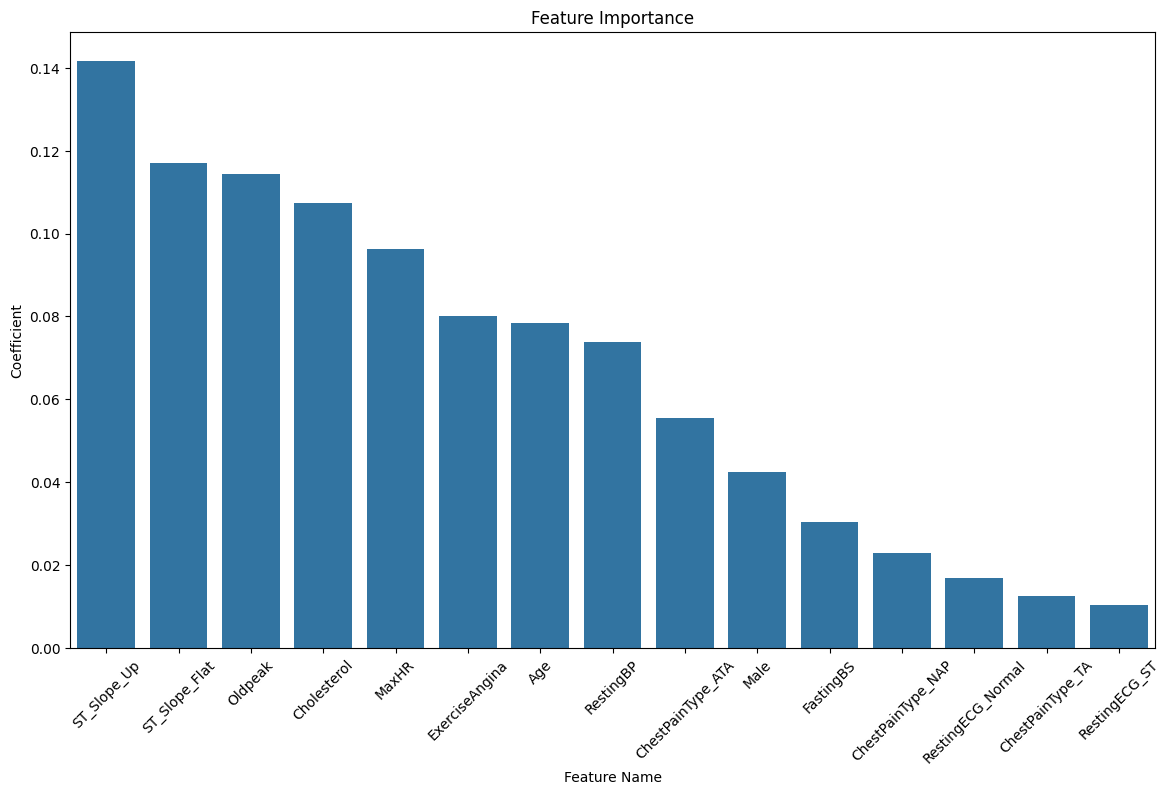

In [55]:
# Displaying the feature importance of the model
feature_importance = model_rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": feature_importance
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(14,8))
sns.barplot(x="Feature", y="Importance", data=feature_importance_df)
plt.xticks(rotation=45)
plt.title("Feature Importance")
plt.xlabel("Feature Name")
plt.ylabel("Coefficient")
plt.show()

The graph above shows that the model suggests that the characteristics of the ST segment during exercise (both upward and flat slopes), oldpeak (ST depression), cholesterol levels, and maximum heart rate are the most significant predictors of heart disease. Age, exercise-induced angina, and resting blood pressure also contribute to the model but to a lesser extent. Gender and certain types of chest pain and resting ECG results have a relatively minor impact on the predictions.

### Conclusion

The models used in this project all performed well with accuracy scores of over 85% meaning that individuals are correctly classified with heart disease or not the majority of the time.

The Random Forest model performed the best when evaluated against the accuracy score, with the cross validation testing of all 3 models reporting similar figures, suggesting none of the models displayed signs of overfitting.

The most important features for identifying heart disease turned out to be the ST segment during exercise, as well as the oldpeak (ST depression), cholesterol levels, and maximum heart rate. Men are more likely than women to have heart disease, and the older you are, the more likely you are, on average, to have heart disease.